In [34]:
#import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb


In [2]:
#pip install kaggle to upload files directly from kaggle to colab
!pip install kaggle

In [3]:
#command to upload kaggle.json file which is api token
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#command to download the competition datasets form kaggle
!kaggle competitions download -c playground-series-s4e5

  0% 0.00/28.0M [00:00<?, ?B/s]
100% 28.0M/28.0M [00:00<00:00, 1.35GB/s]


In [5]:
#unzip the downloaded file
!unzip playground-series-s4e5.zip

Archive:  playground-series-s4e5.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
#read both file using pandas
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [7]:
#EDA of train_data
train_data

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [9]:
train_data.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [10]:
train_data.isnull().sum()

,0
id,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0


In [11]:
train_data.duplicated().sum()

np.int64(0)

In [12]:
#EDA of train_data
test_data

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

In [14]:
test_data.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,7.453050e+05,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,...,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000
mean,1.490609e+06,4.915610,4.930288,4.960027,4.946084,4.938424,4.933524,4.958468,4.927651,4.945308,...,4.947436,4.944003,4.957209,4.927620,4.930720,4.926062,4.926957,4.948424,4.940204,4.943918
std,2.151512e+05,2.056295,2.094117,2.071722,2.052602,2.081816,2.059243,2.089312,2.068110,2.073404,...,2.081322,2.072335,2.088787,2.079006,2.083348,2.065638,2.073692,2.065891,2.079128,2.087387
min,1.117957e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.304283e+06,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,1.490609e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,1.676935e+06,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,1.863261e+06,16.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,16.000000,16.000000,...,16.000000,17.000000,17.000000,16.000000,16.000000,17.000000,19.000000,22.000000,16.000000,16.000000


In [15]:
test_data.duplicated().sum()

np.int64(0)

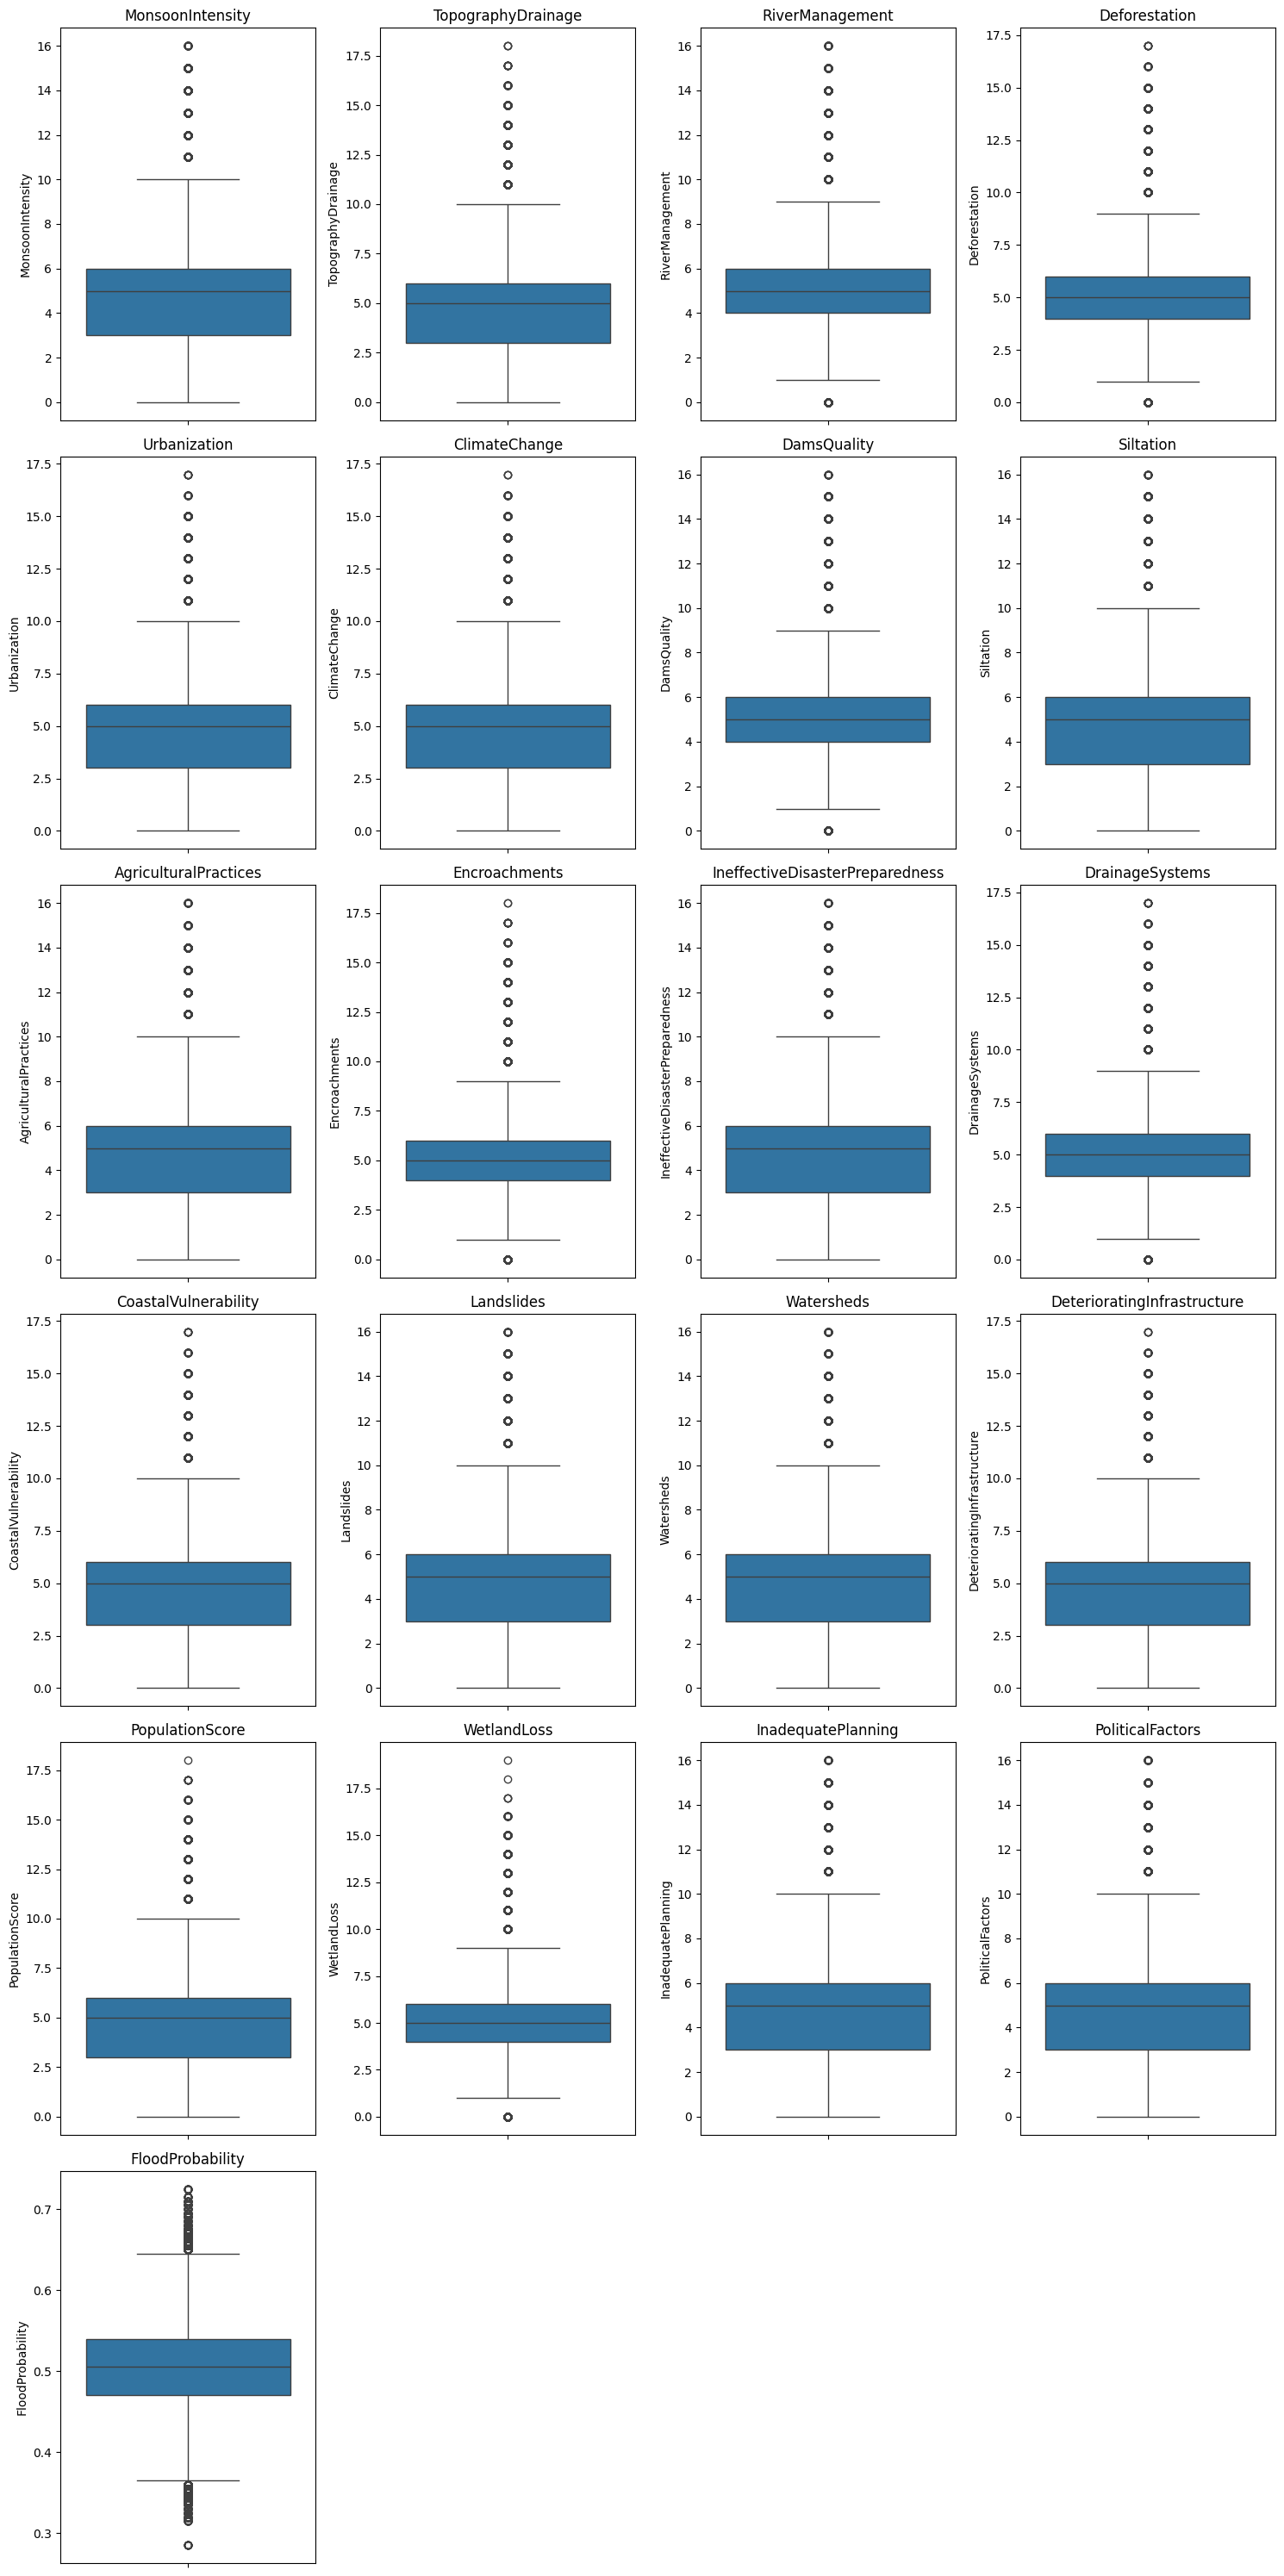

In [16]:
# identifying and handling outliers in train_data
# select only numerical columns from the train data
numerical_cols_train = train_data.select_dtypes(include=[np.number]).columns
numerical_cols_train = numerical_cols_train.drop('id') # Exclude the 'id' column

# Calculate the number of rows and columns for subplots
n_cols_train = 4  # You can adjust this number
n_rows_train = (len(numerical_cols_train) + n_cols_train - 1) // n_cols_train

#create box plots for each numerical columns
plt.figure(figsize=(15, n_rows_train * 5)) # Adjust figure size based on the number of rows
for i, col in enumerate(numerical_cols_train):
    plt.subplot(n_rows_train, n_cols_train, i + 1)
    sns.boxplot(y=train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [17]:
#identifying outliers using IQR method
# Calculate Q1, Q3, and IQR
outlier_indices = {}

for col in numerical_cols_train:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1

    #define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #identify indices of outliers
    outlier_list_col = train_data[(train_data[col] < lower_bound) | (train_data[col] > upper_bound)].index
    outlier_indices[col] = outlier_list_col

#display the number of outliers ofund in each column
for col, indices in outlier_indices.items():
    print(f"Number of outliers in '{col}': {len(indices)}")

Number of outliers in 'MonsoonIntensity': 9244
Number of outliers in 'TopographyDrainage': 9575
Number of outliers in 'RiverManagement': 29617
Number of outliers in 'Deforestation': 28235
Number of outliers in 'Urbanization': 9184
Number of outliers in 'ClimateChange': 8702
Number of outliers in 'DamsQuality': 31097
Number of outliers in 'Siltation': 9079
Number of outliers in 'AgriculturalPractices': 9006
Number of outliers in 'Encroachments': 31141
Number of outliers in 'IneffectiveDisasterPreparedness': 8945
Number of outliers in 'DrainageSystems': 30060
Number of outliers in 'CoastalVulnerability': 10209
Number of outliers in 'Landslides': 8865
Number of outliers in 'Watersheds': 9245
Number of outliers in 'DeterioratingInfrastructure': 8971
Number of outliers in 'PopulationScore': 9290
Number of outliers in 'WetlandLoss': 29499
Number of outliers in 'InadequatePlanning': 9299
Number of outliers in 'PoliticalFactors': 9707
Number of outliers in 'FloodProbability': 5579


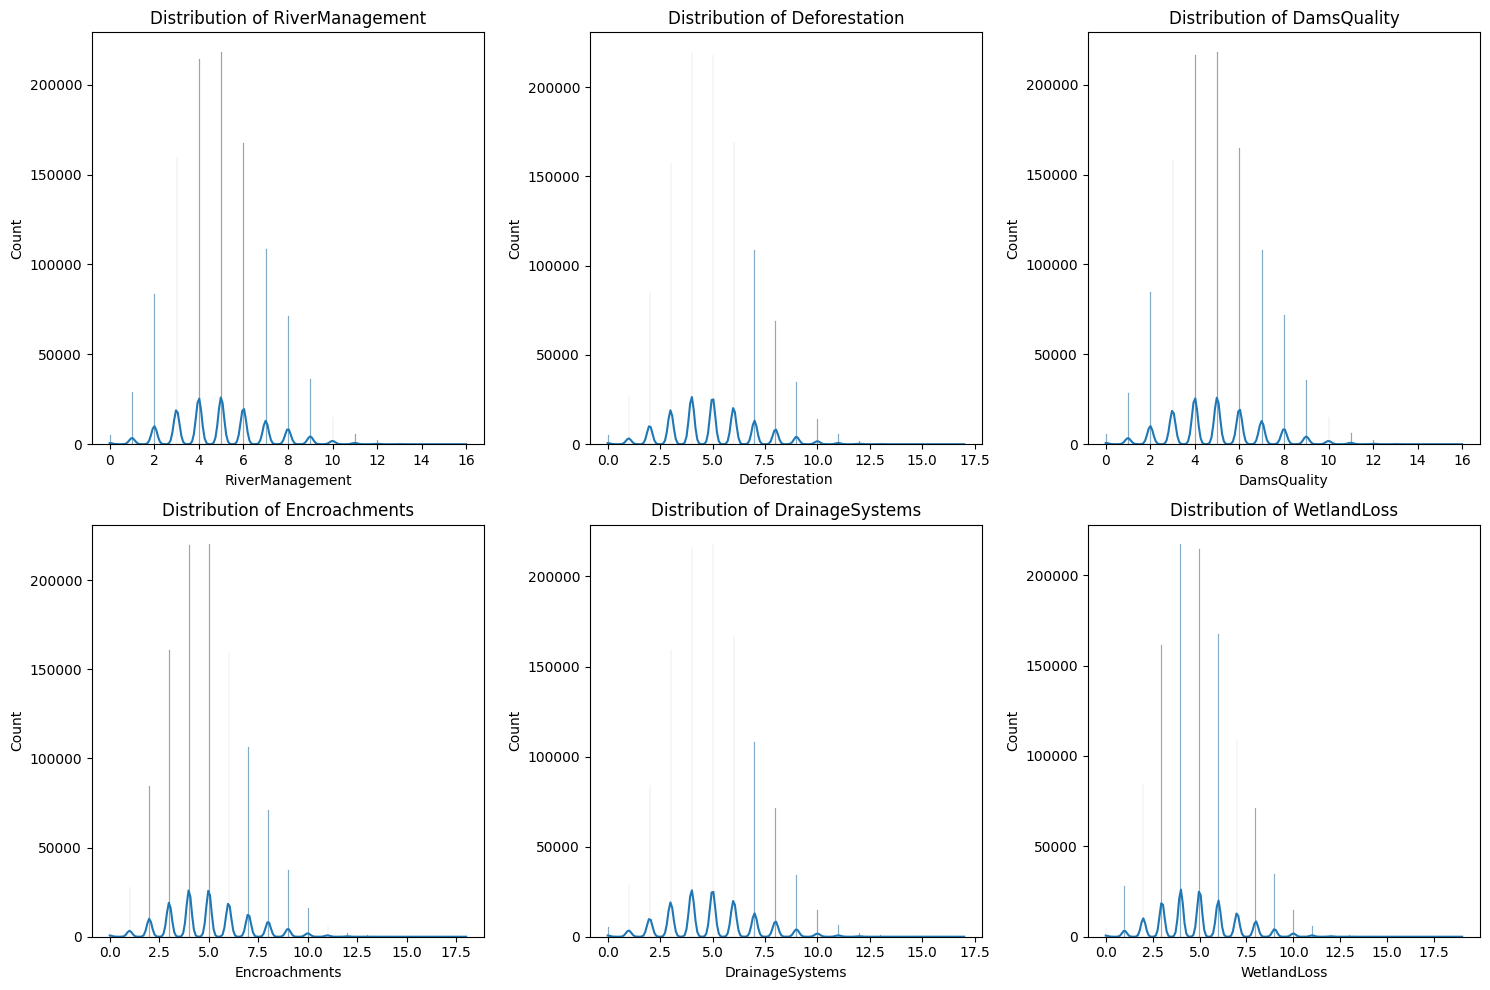


Skewness of columns with most outliers:
RiverManagement    0.426491
Deforestation      0.434314
DamsQuality        0.441402
Encroachments      0.463551
DrainageSystems    0.441420
WetlandLoss        0.437045
dtype: float64


In [18]:
# Columns with the highest number of outliers identified earlier
cols_with_most_outliers = [
    'RiverManagement',
    'Deforestation',
    'DamsQuality',
    'Encroachments',
    'DrainageSystems',
    'WetlandLoss'
]

# Create histograms and density plots for these columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_with_most_outliers):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=train_data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Calculate skewness for these columns
skewness_values = train_data[cols_with_most_outliers].skew()
print("\nSkewness of columns with most outliers:")
print(skewness_values)

In [19]:
#implement winsorizing on columns with most outliers because they are not heavily skewed
cols_to_winsorize = cols_with_most_outliers

for col in cols_to_winsorize:
    #calculate the 5th and 95th percentiles
    lower_bound = train_data[col].quantile(0.05)
    upper_bound = train_data[col].quantile(0.95)

    #apply winsorizing (clipping)
    train_data[col] = np.clip(train_data[col], lower_bound, upper_bound)

print("Winsorizing applied to the following columns in train_data:")
print(cols_to_winsorize)

Winsorizing applied to the following columns in train_data:
['RiverManagement', 'Deforestation', 'DamsQuality', 'Encroachments', 'DrainageSystems', 'WetlandLoss']


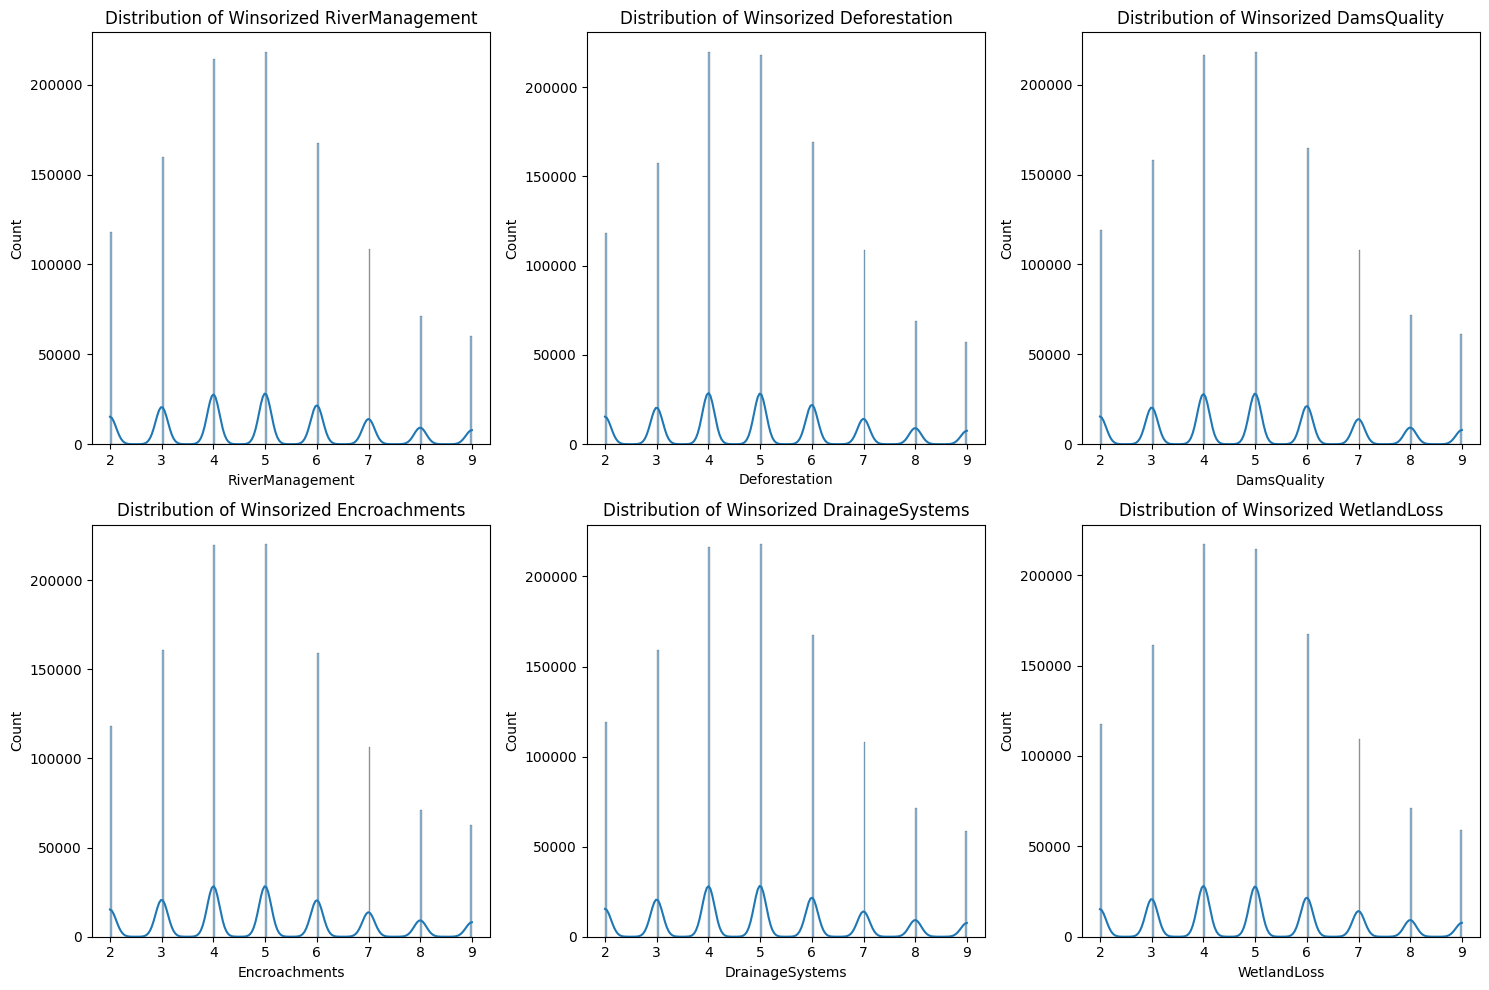


Skewness of columns with most outliers after winsorized:
RiverManagement    0.338536
Deforestation      0.338733
DamsQuality        0.342467
Encroachments      0.364106
DrainageSystems    0.339304
WetlandLoss        0.340553
dtype: float64


In [20]:
# Visualize distributions of Winsorized columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_winsorize):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=train_data, x=col, kde=True)
    plt.title(f'Distribution of Winsorized {col}')
plt.tight_layout()
plt.show()

# Calculate skewness for these columns
skewness_values = train_data[cols_to_winsorize].skew()
print("\nSkewness of columns with most outliers after winsorized:")
print(skewness_values)

In [21]:
# Identify columns already Winsorized
cols_winsorized = cols_to_winsorize

# Identify remaining numerical columns to Winsorize
remaining_cols_to_winsorize = [col for col in numerical_cols_train if col not in cols_winsorized]

print(f"Applying Winsorizing to the following remaining columns: {remaining_cols_to_winsorize}")

for col in remaining_cols_to_winsorize:
    # Calculate the 5th and 95th percentiles
    lower_bound = train_data[col].quantile(0.05)
    upper_bound = train_data[col].quantile(0.95)

    # Apply winsorizing (clipping)
    train_data[col] = np.clip(train_data[col], lower_bound, upper_bound)

print("\nWinsorizing applied to the remaining numerical columns in train_data.")

Applying Winsorizing to the following remaining columns: ['MonsoonIntensity', 'TopographyDrainage', 'Urbanization', 'ClimateChange', 'Siltation', 'AgriculturalPractices', 'IneffectiveDisasterPreparedness', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']

Winsorizing applied to the remaining numerical columns in train_data.


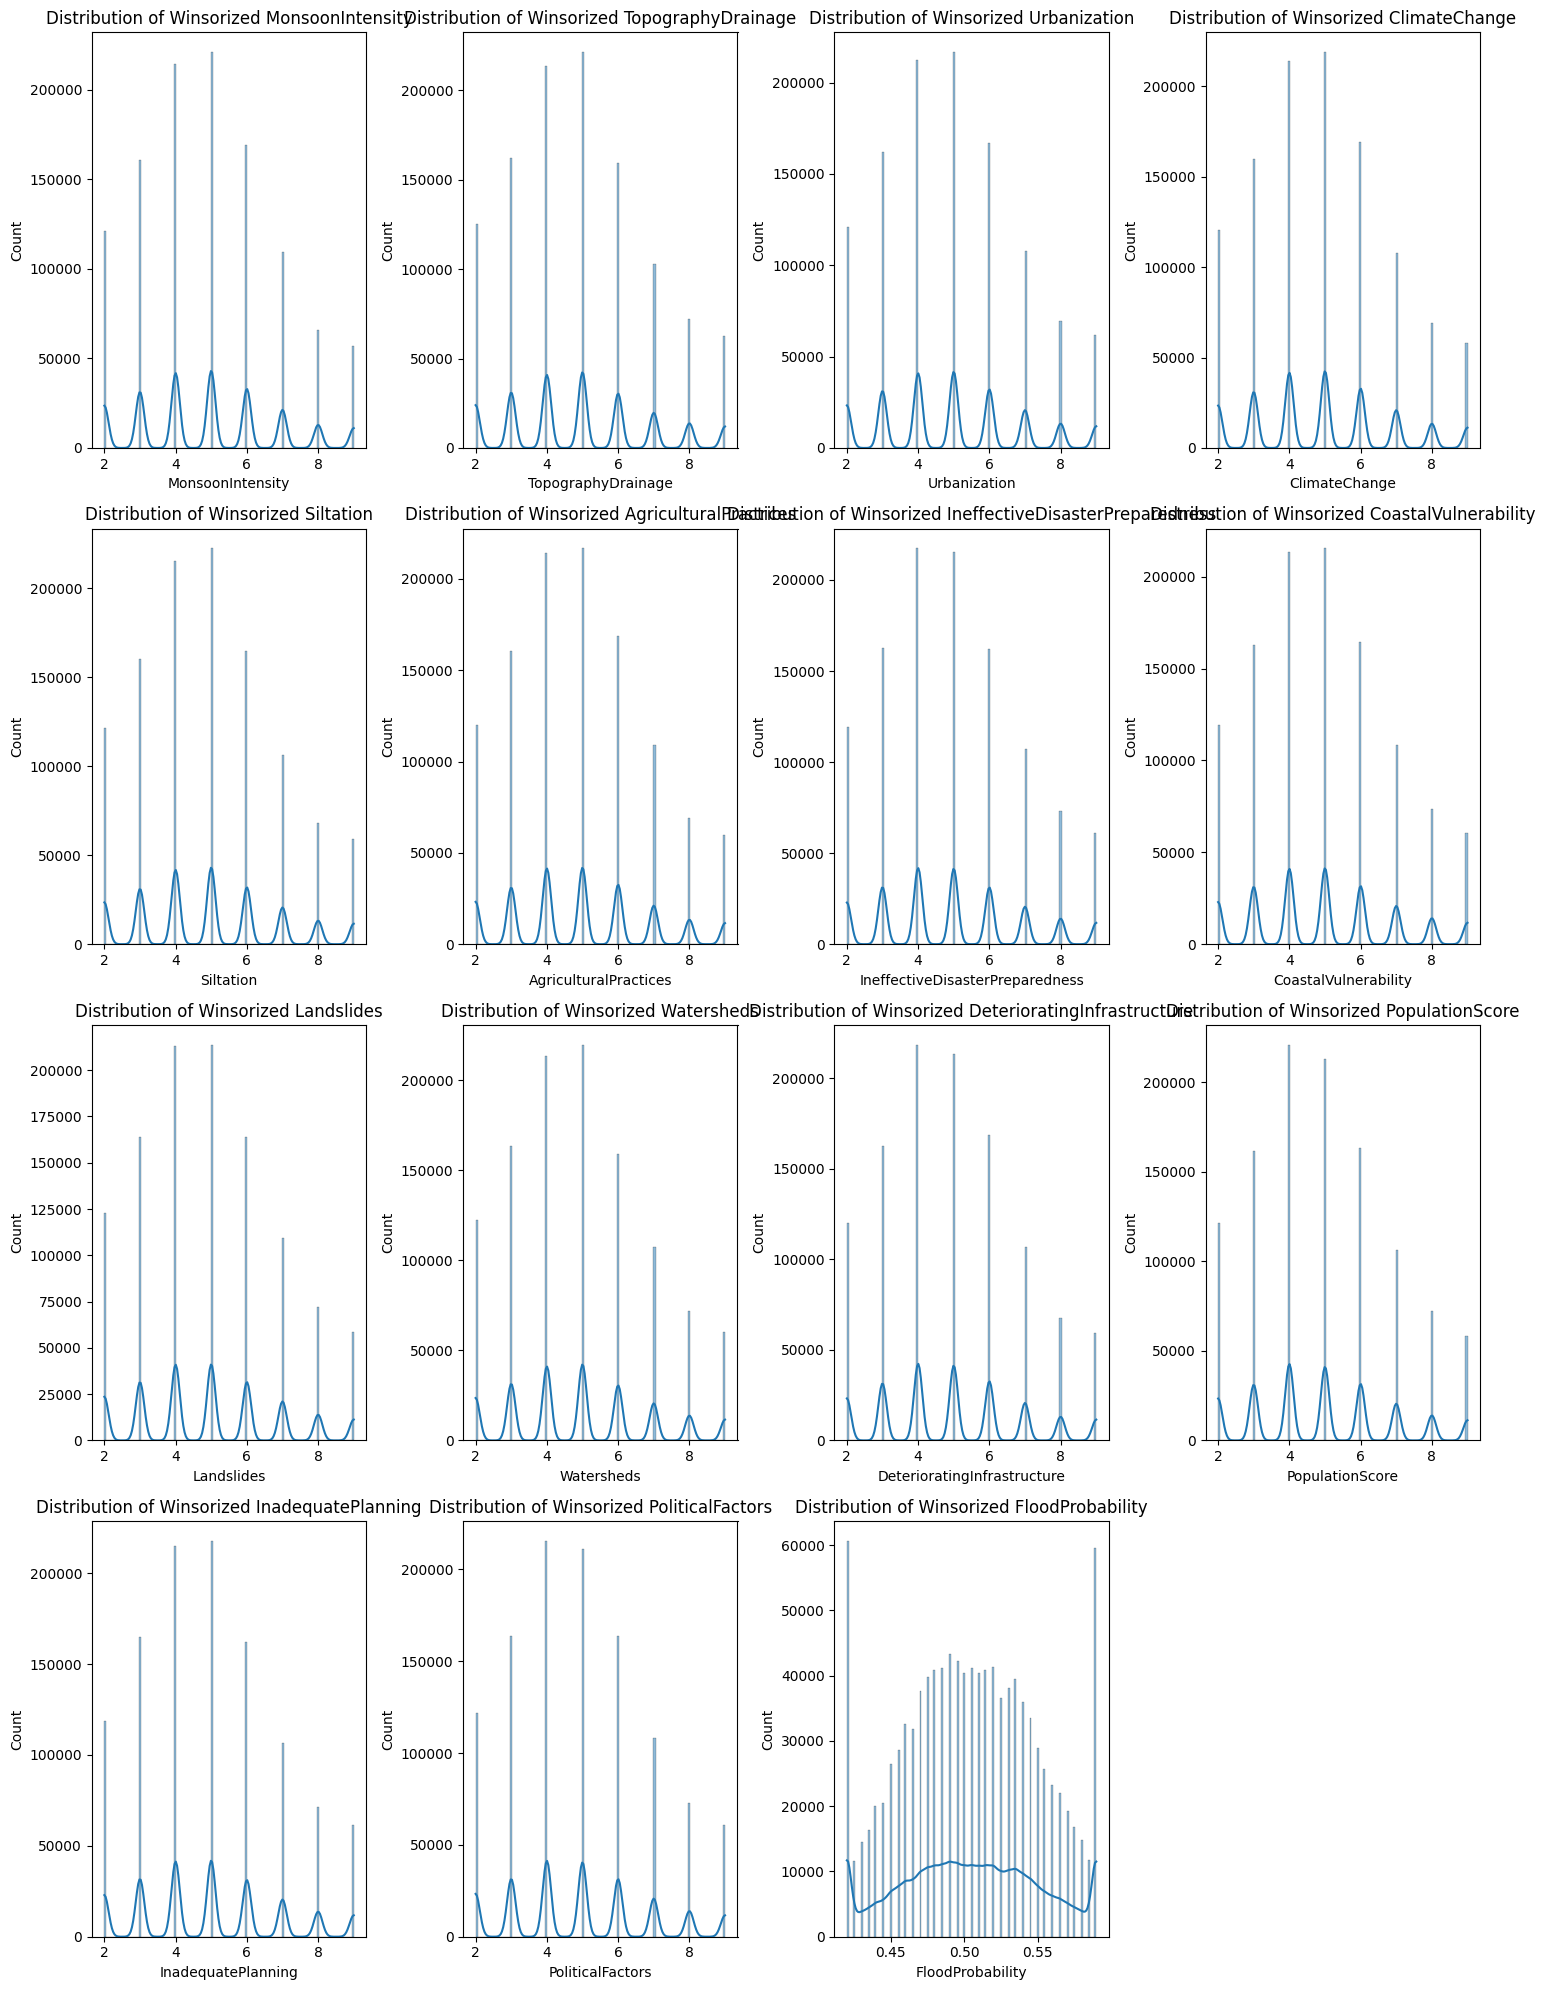

In [22]:
# Visualize distributions of remaining Winsorized columns

# Identify remaining numerical columns that were Winsorized
remaining_cols_winsorized = remaining_cols_to_winsorize

# Calculate the number of rows and columns for subplots
n_cols = 4  # You can adjust this number
n_rows = (len(remaining_cols_winsorized) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5)) # Adjust figure size based on the number of rows
for i, col in enumerate(remaining_cols_winsorized):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=train_data, x=col, kde=True)
    plt.title(f'Distribution of Winsorized {col}')
plt.tight_layout()
plt.show()

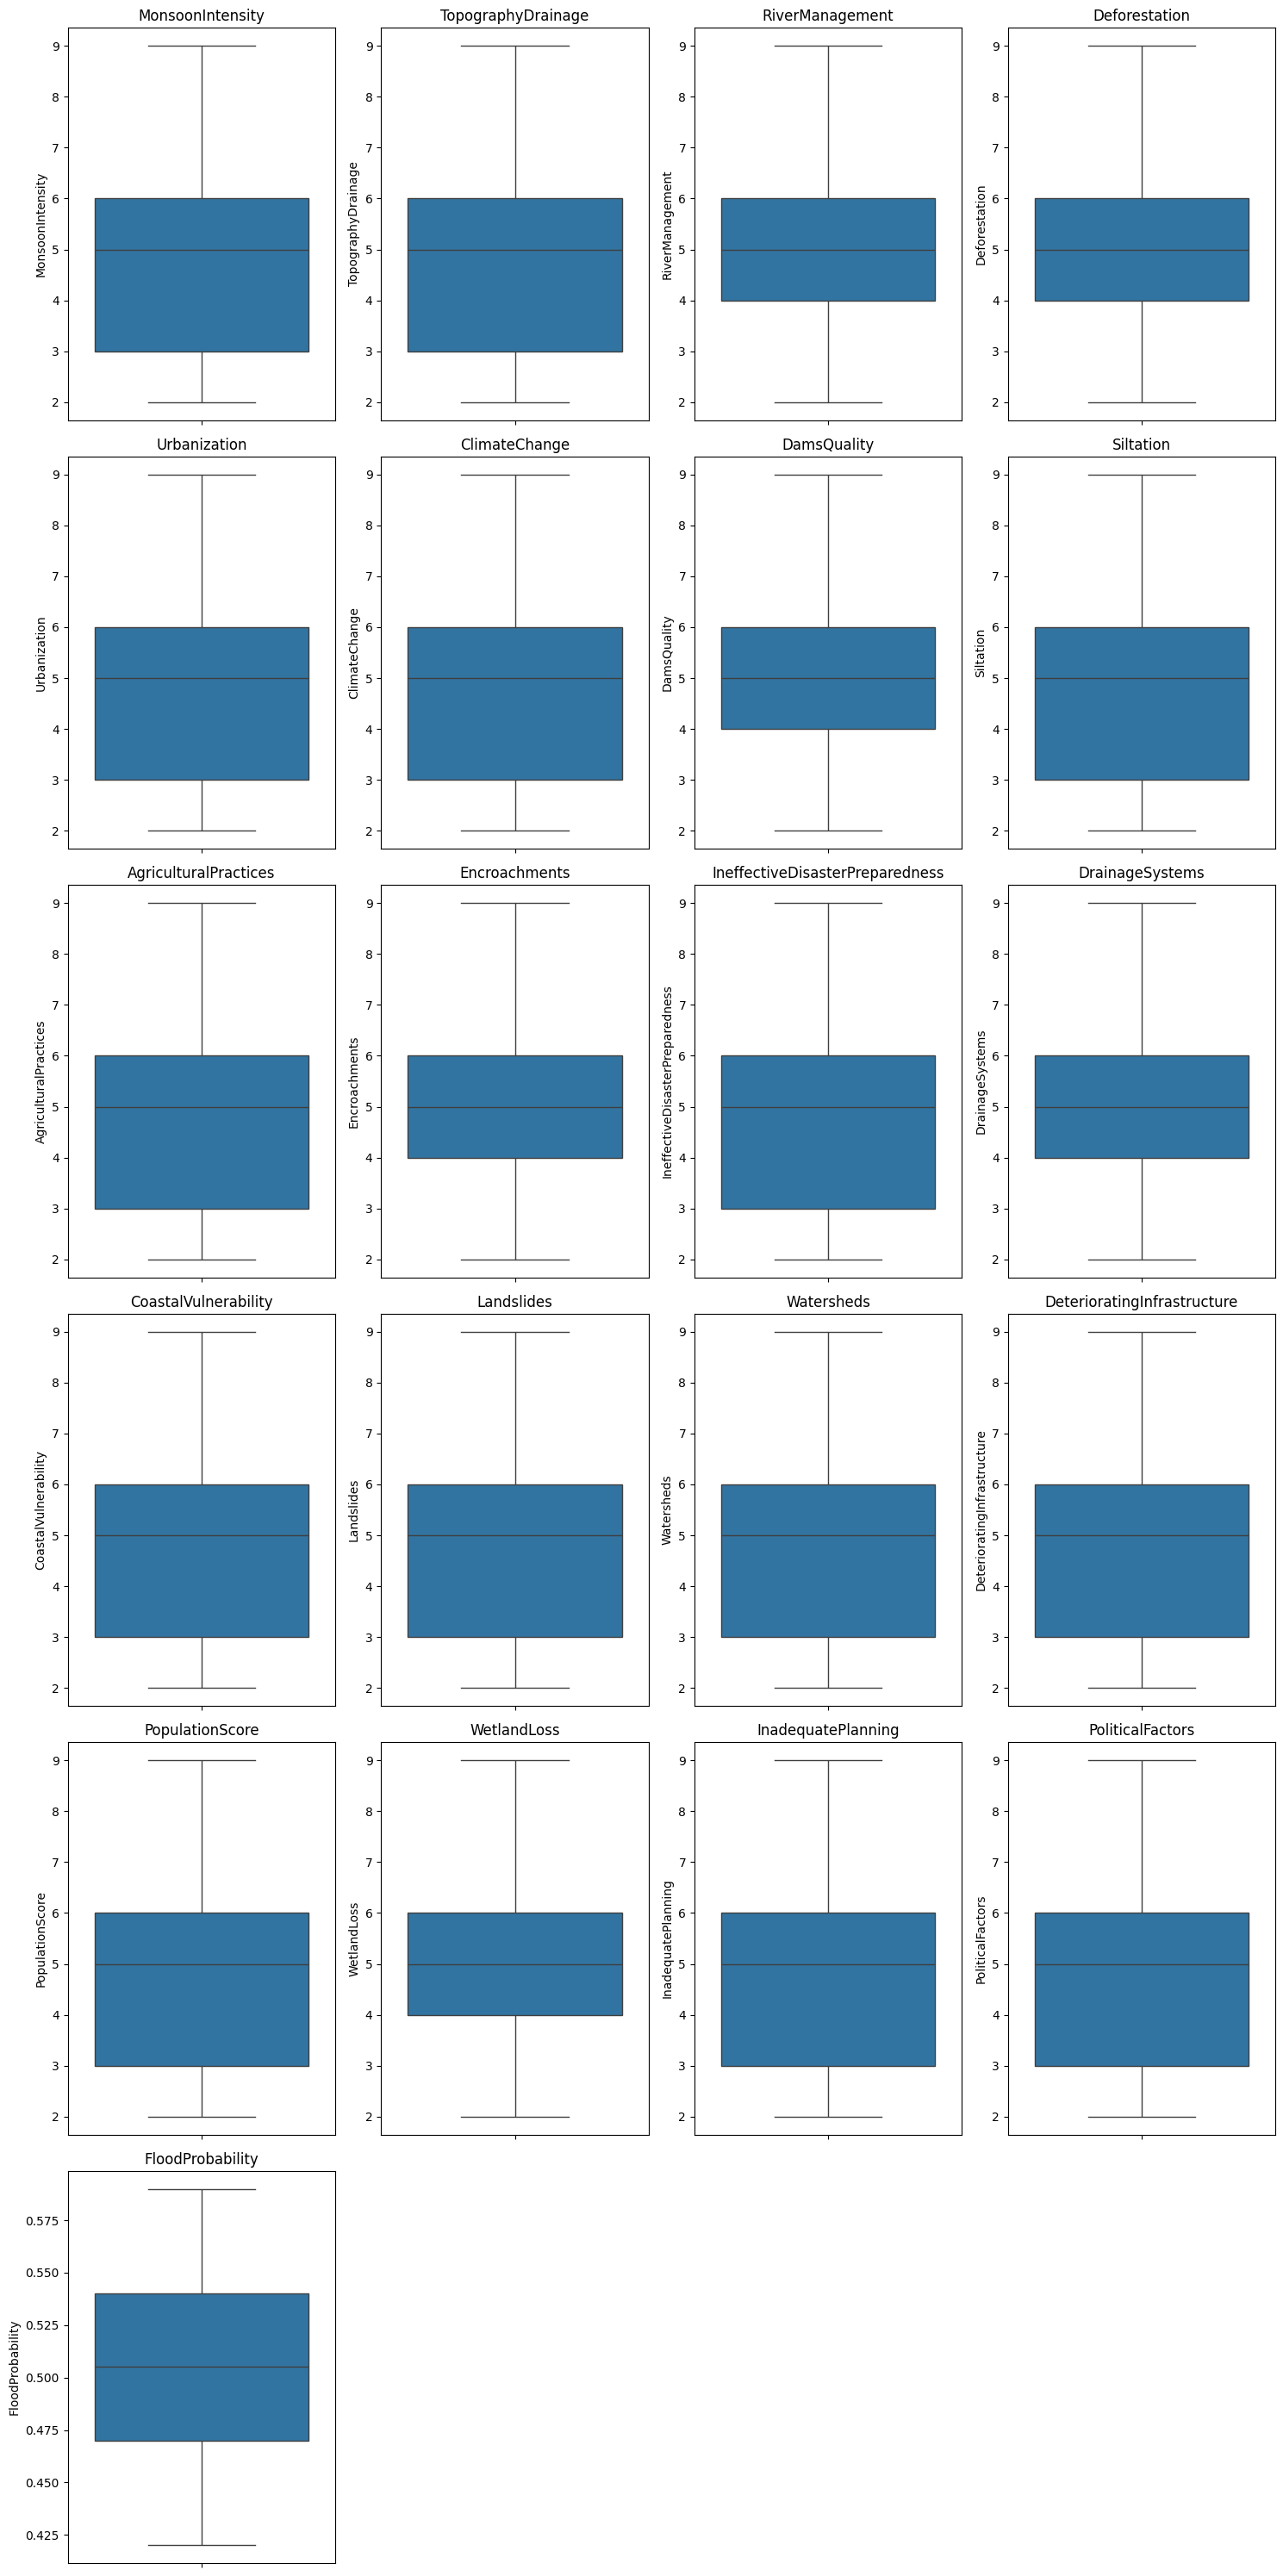

In [23]:
#confirming if the outliers are handled or not
plt.figure(figsize=(15, n_rows_train * 5)) # Adjust figure size based on the number of rows
for i, col in enumerate(numerical_cols_train):
    plt.subplot(n_rows_train, n_cols_train, i + 1)
    sns.boxplot(y=train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

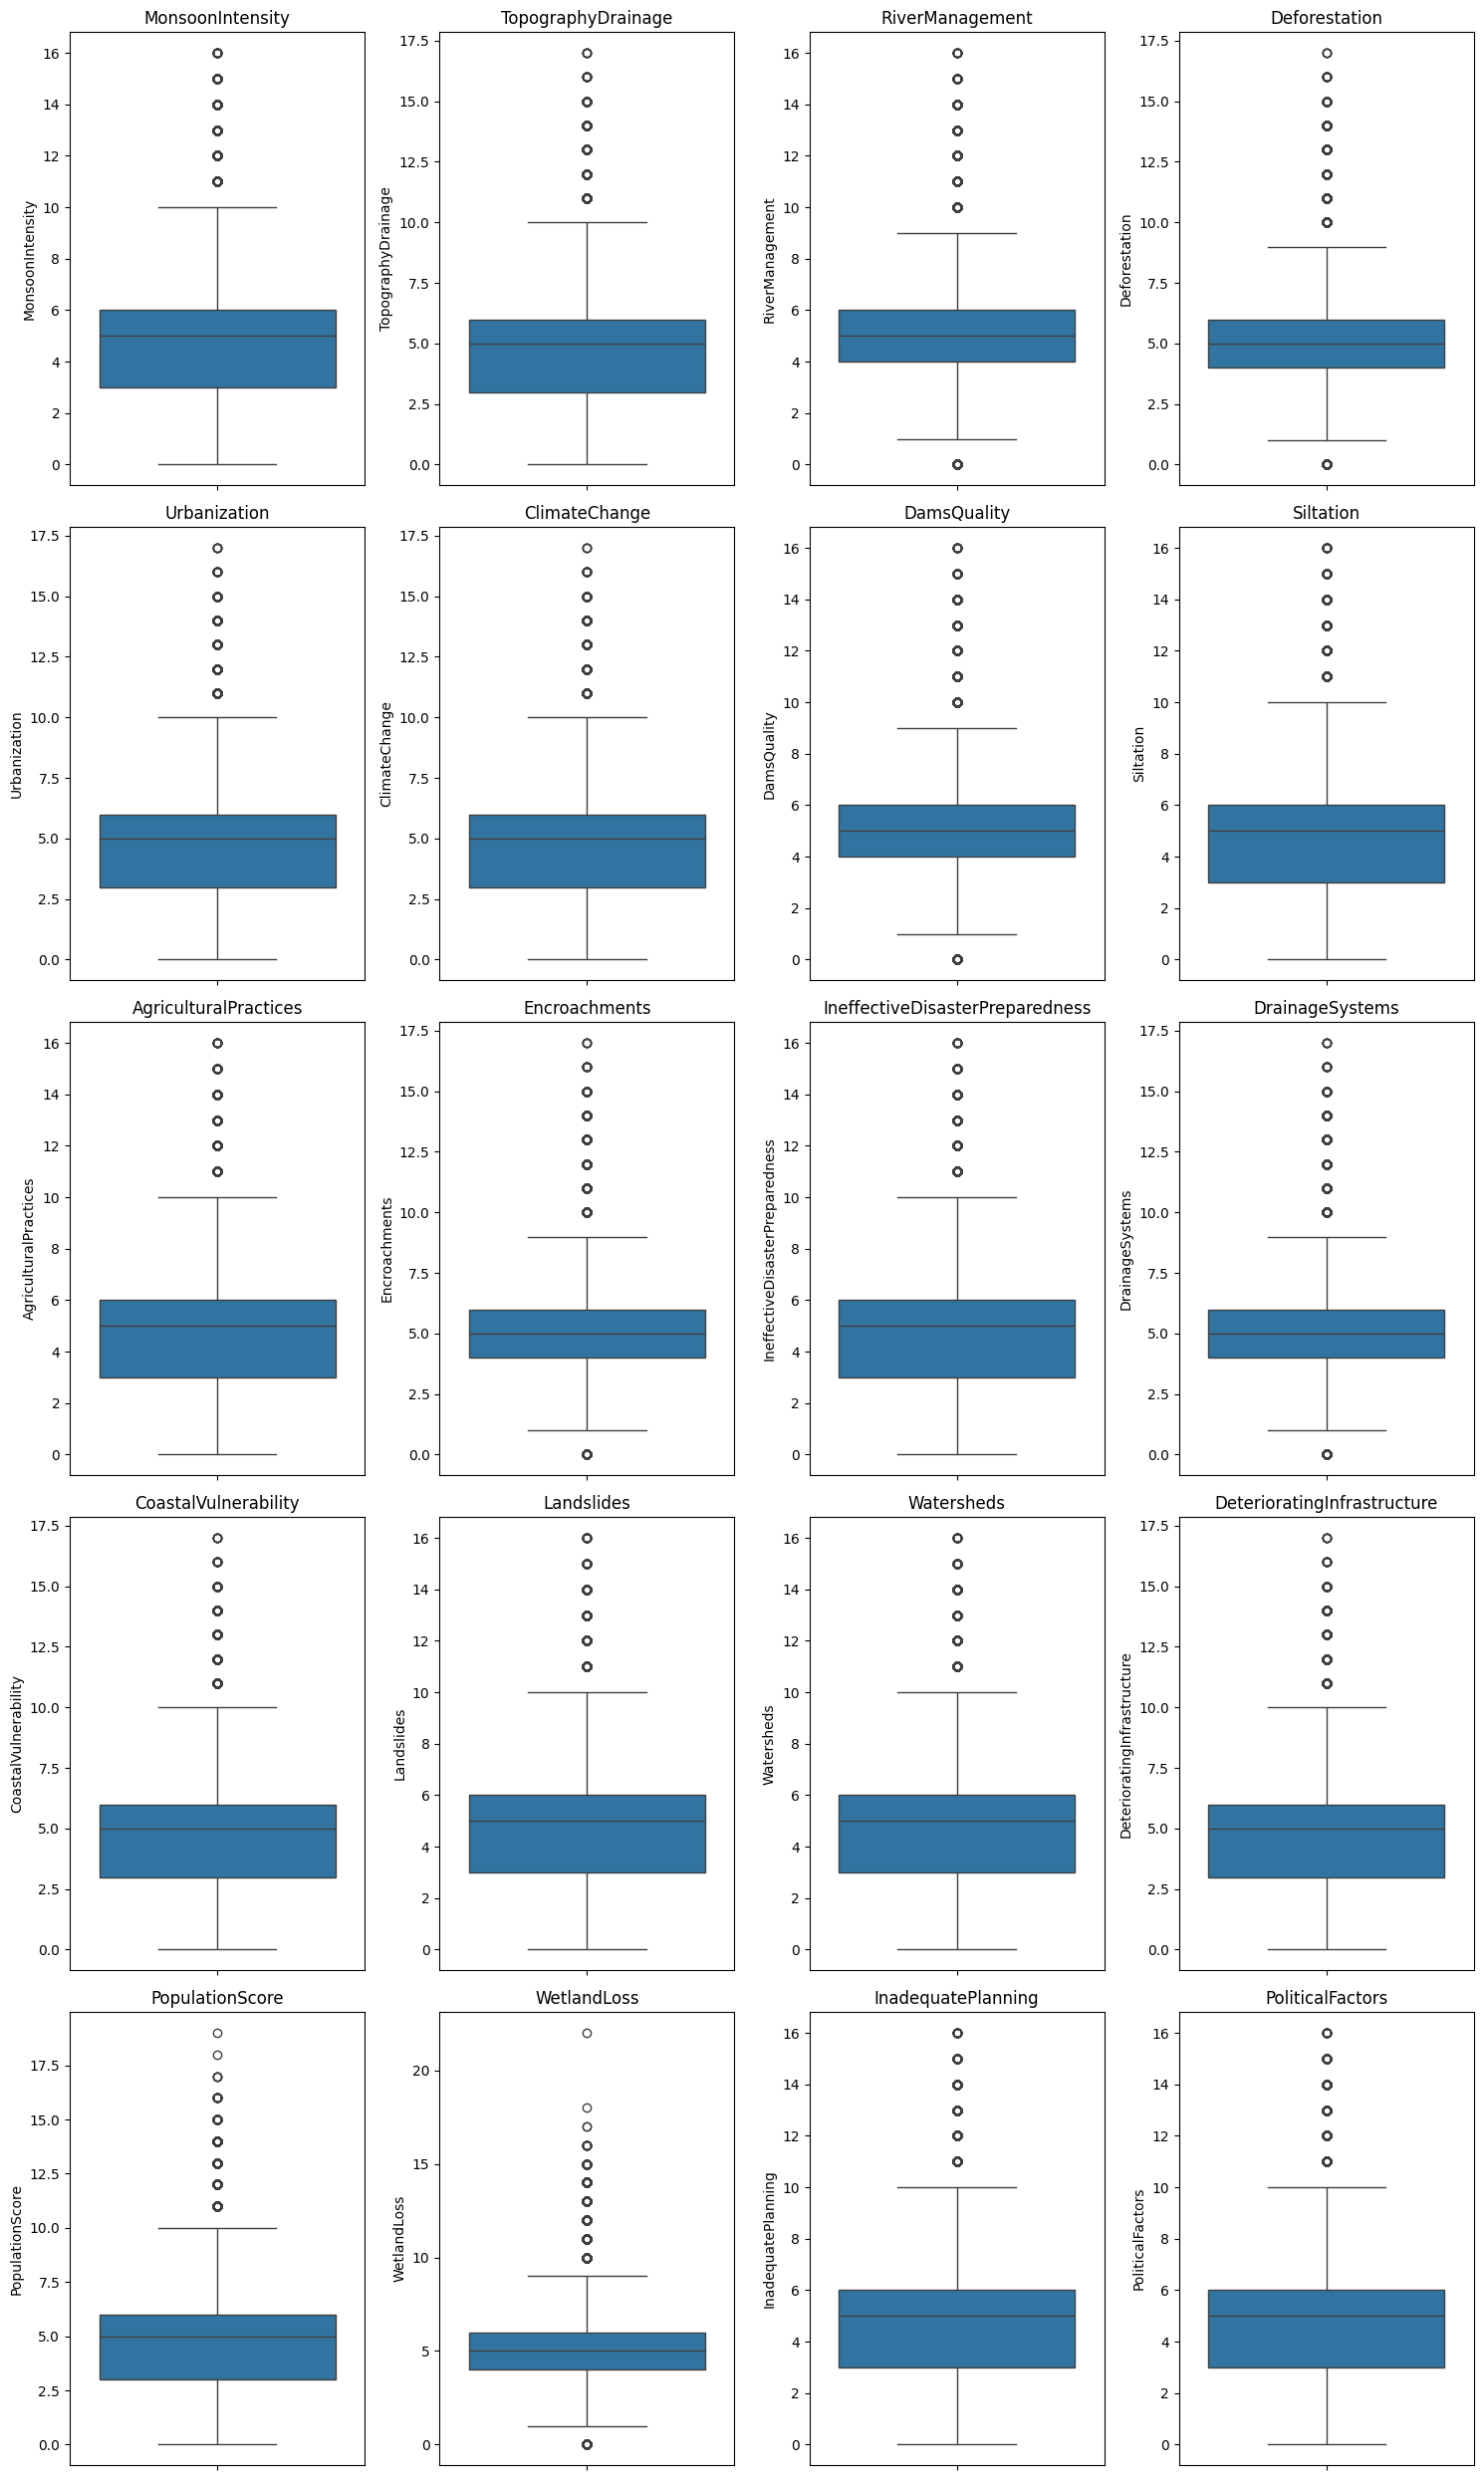

In [24]:
#now doing everything same but with test data
# identifying and handling outliers in test_data
# select only numerical columns from the test data
numerical_cols_test = test_data.select_dtypes(include=[np.number]).columns
numerical_cols_test = numerical_cols_test.drop('id') # Exclude the 'id' column

# Calculate the number of rows and columns for subplots
n_cols_test = 4  # You can adjust this number
n_rows_test = (len(numerical_cols_test) + n_cols_test - 1) // n_cols_test

#create box plots for each numerical columns
plt.figure(figsize=(15, n_rows_test * 5)) # Adjust figure size based on the number of rows
for i, col in enumerate(numerical_cols_test):
    plt.subplot(n_rows_test, n_cols_test, i + 1)
    sns.boxplot(y=test_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [25]:
#identifying outliers using IQR method
# Calculate Q1, Q3, and IQR
outlier_indices = {}

for col in numerical_cols_test:
    Q1 = test_data[col].quantile(0.25)
    Q3 = test_data[col].quantile(0.75)
    IQR = Q3 - Q1

    #define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #identify indices of outliers
    outlier_list_col = test_data[(test_data[col] < lower_bound) | (test_data[col] > upper_bound)].index
    outlier_indices[col] = outlier_list_col

#display the number of outliers ofund in each column
for col, indices in outlier_indices.items():
    print(f"Number of outliers in '{col}': {len(indices)}")

Number of outliers in 'MonsoonIntensity': 5986
Number of outliers in 'TopographyDrainage': 6456
Number of outliers in 'RiverManagement': 19911
Number of outliers in 'Deforestation': 18972
Number of outliers in 'Urbanization': 6227
Number of outliers in 'ClimateChange': 5739
Number of outliers in 'DamsQuality': 20905
Number of outliers in 'Siltation': 6188
Number of outliers in 'AgriculturalPractices': 6103
Number of outliers in 'Encroachments': 20471
Number of outliers in 'IneffectiveDisasterPreparedness': 6099
Number of outliers in 'DrainageSystems': 20090
Number of outliers in 'CoastalVulnerability': 6745
Number of outliers in 'Landslides': 5911
Number of outliers in 'Watersheds': 6124
Number of outliers in 'DeterioratingInfrastructure': 6028
Number of outliers in 'PopulationScore': 6054
Number of outliers in 'WetlandLoss': 19507
Number of outliers in 'InadequatePlanning': 6127
Number of outliers in 'PoliticalFactors': 6570


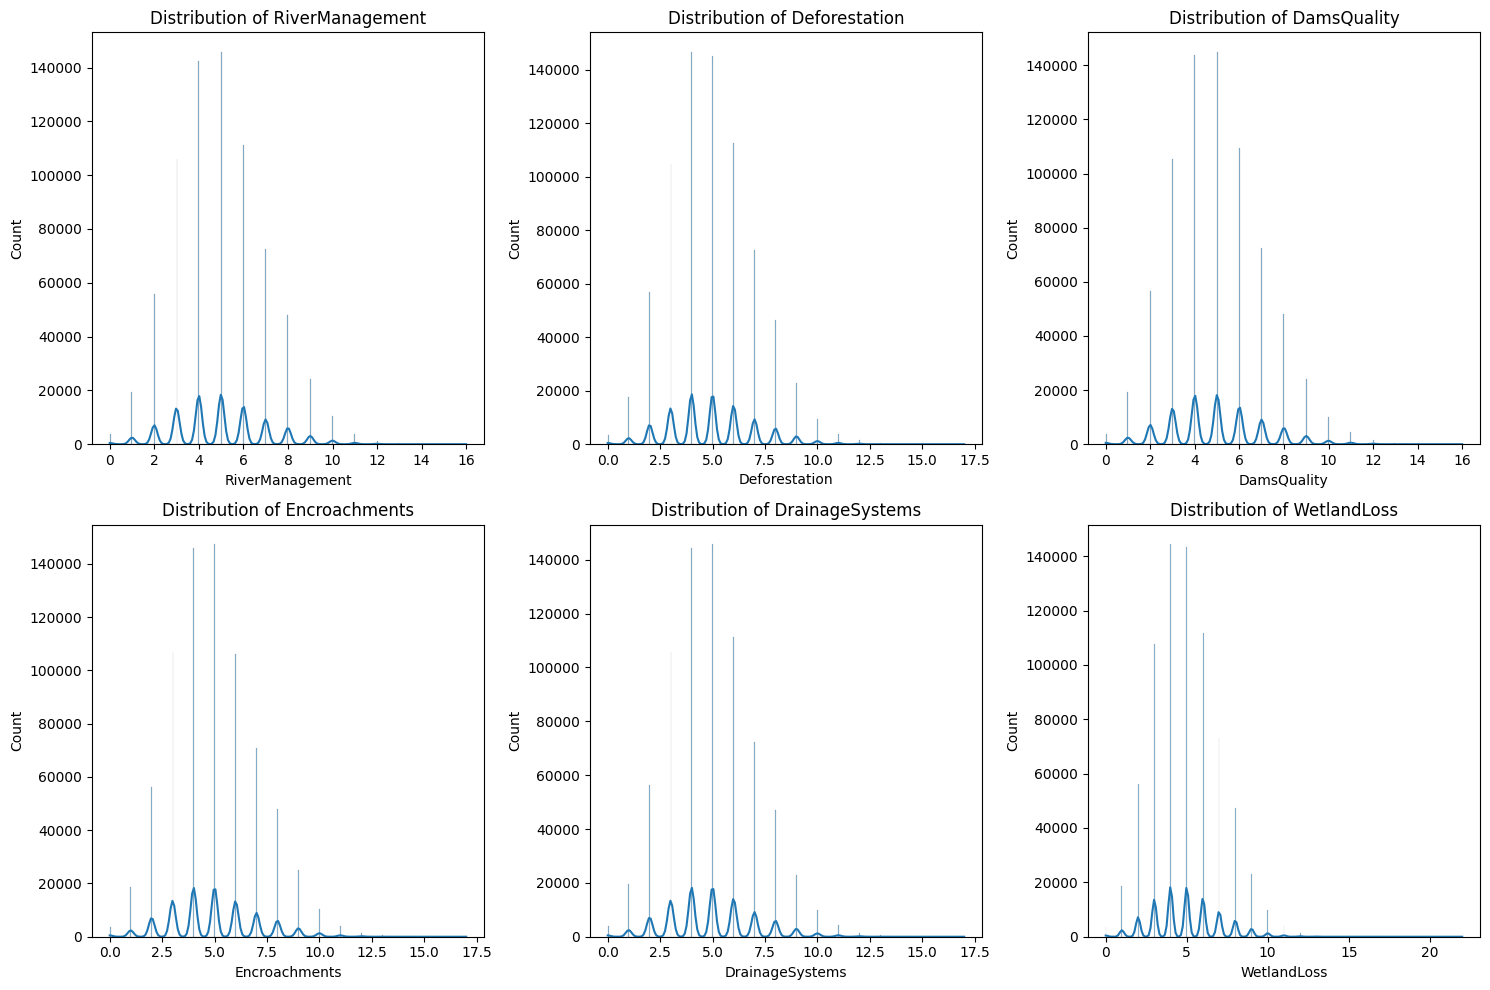


Skewness of columns with most outliers:
RiverManagement    0.413858
Deforestation      0.438962
DamsQuality        0.441073
Encroachments      0.454514
DrainageSystems    0.437780
WetlandLoss        0.432166
dtype: float64


In [26]:
# Columns with the highest number of outliers identified earlier
cols_with_most_outliers = [
    'RiverManagement',
    'Deforestation',
    'DamsQuality',
    'Encroachments',
    'DrainageSystems',
    'WetlandLoss'
]

# Create histograms and density plots for these columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_with_most_outliers):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=test_data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Calculate skewness for these columns
skewness_values = test_data[cols_with_most_outliers].skew()
print("\nSkewness of columns with most outliers:")
print(skewness_values)

In [27]:
#implement winsorizing on columns with most outliers because they are not heavily skewed
cols_to_winsorize = cols_with_most_outliers

for col in cols_to_winsorize:
    #calculate the 5th and 95th percentiles
    lower_bound = test_data[col].quantile(0.05)
    upper_bound = test_data[col].quantile(0.95)

    #apply winsorizing (clipping)
    test_data[col] = np.clip(test_data[col], lower_bound, upper_bound)

print("Winsorizing applied to the following columns in train_data:")
print(cols_to_winsorize)

Winsorizing applied to the following columns in train_data:
['RiverManagement', 'Deforestation', 'DamsQuality', 'Encroachments', 'DrainageSystems', 'WetlandLoss']


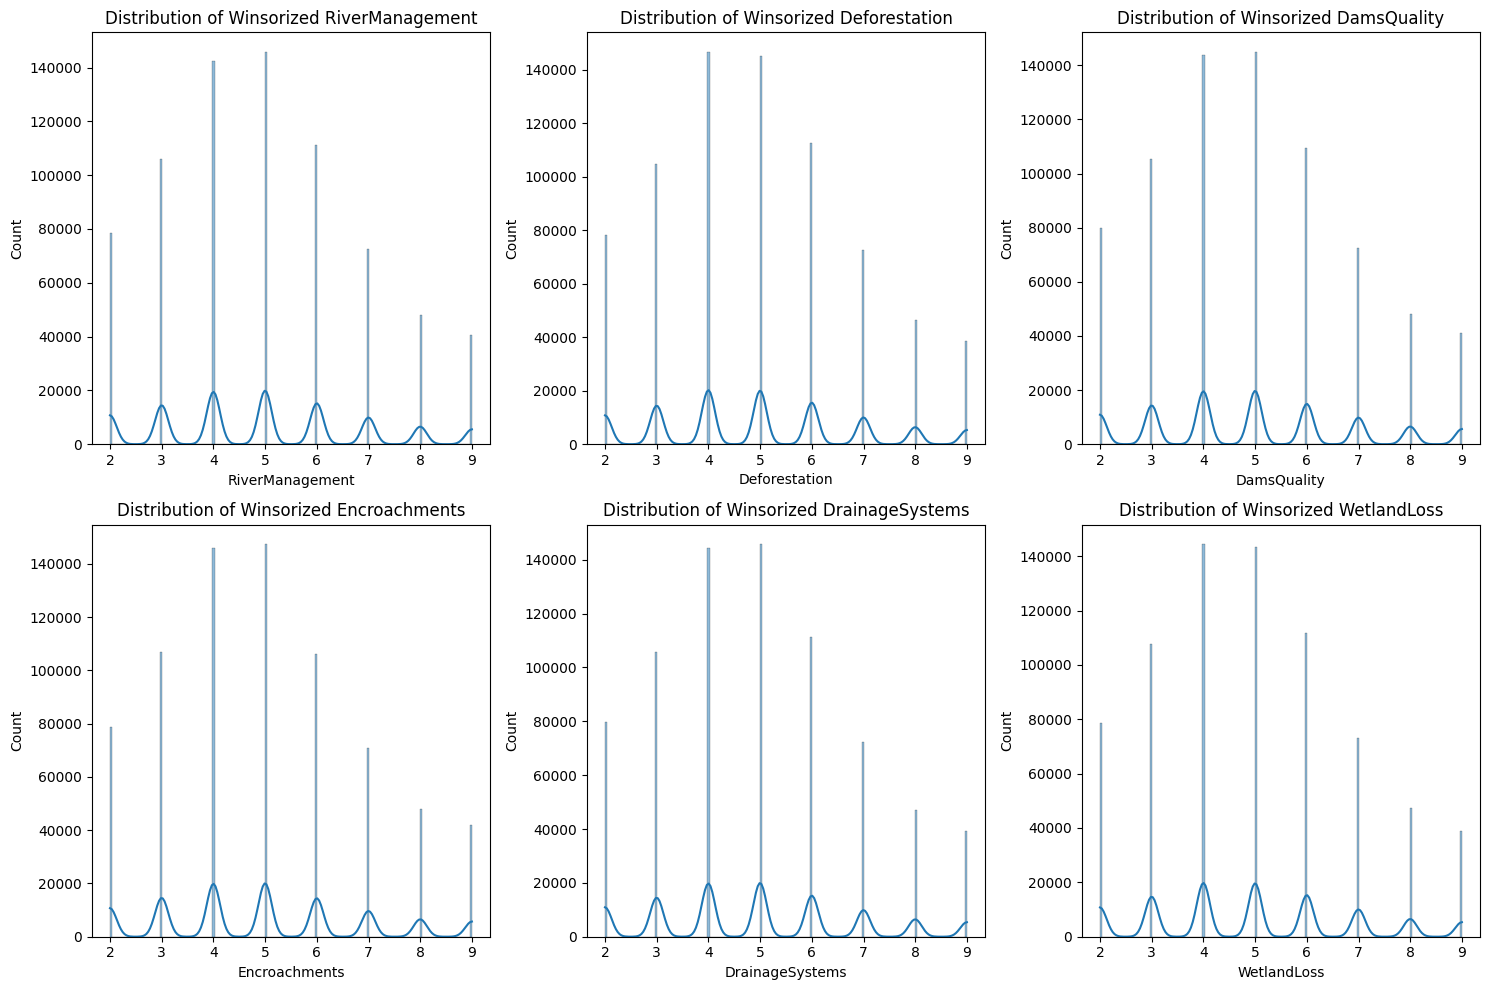


Skewness of columns with most outliers after winsorized:
RiverManagement    0.335311
Deforestation      0.338715
DamsQuality        0.341010
Encroachments      0.361219
DrainageSystems    0.340303
WetlandLoss        0.338002
dtype: float64


In [28]:
# Visualize distributions of Winsorized columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_winsorize):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=test_data, x=col, kde=True)
    plt.title(f'Distribution of Winsorized {col}')
plt.tight_layout()
plt.show()

# Calculate skewness for these columns
skewness_values = test_data[cols_to_winsorize].skew()
print("\nSkewness of columns with most outliers after winsorized:")
print(skewness_values)

In [29]:
# Identify columns already Winsorized
cols_winsorized = cols_to_winsorize

# Identify remaining numerical columns to Winsorize
remaining_cols_to_winsorize = [col for col in numerical_cols_test if col not in cols_winsorized]

print(f"Applying Winsorizing to the following remaining columns: {remaining_cols_to_winsorize}")

for col in remaining_cols_to_winsorize:
    # Calculate the 5th and 95th percentiles
    lower_bound = test_data[col].quantile(0.05)
    upper_bound = test_data[col].quantile(0.95)

    # Apply winsorizing (clipping)
    test_data[col] = np.clip(test_data[col], lower_bound, upper_bound)

print("\nWinsorizing applied to the remaining numerical columns in test_data.")

Applying Winsorizing to the following remaining columns: ['MonsoonIntensity', 'TopographyDrainage', 'Urbanization', 'ClimateChange', 'Siltation', 'AgriculturalPractices', 'IneffectiveDisasterPreparedness', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'InadequatePlanning', 'PoliticalFactors']

Winsorizing applied to the remaining numerical columns in test_data.


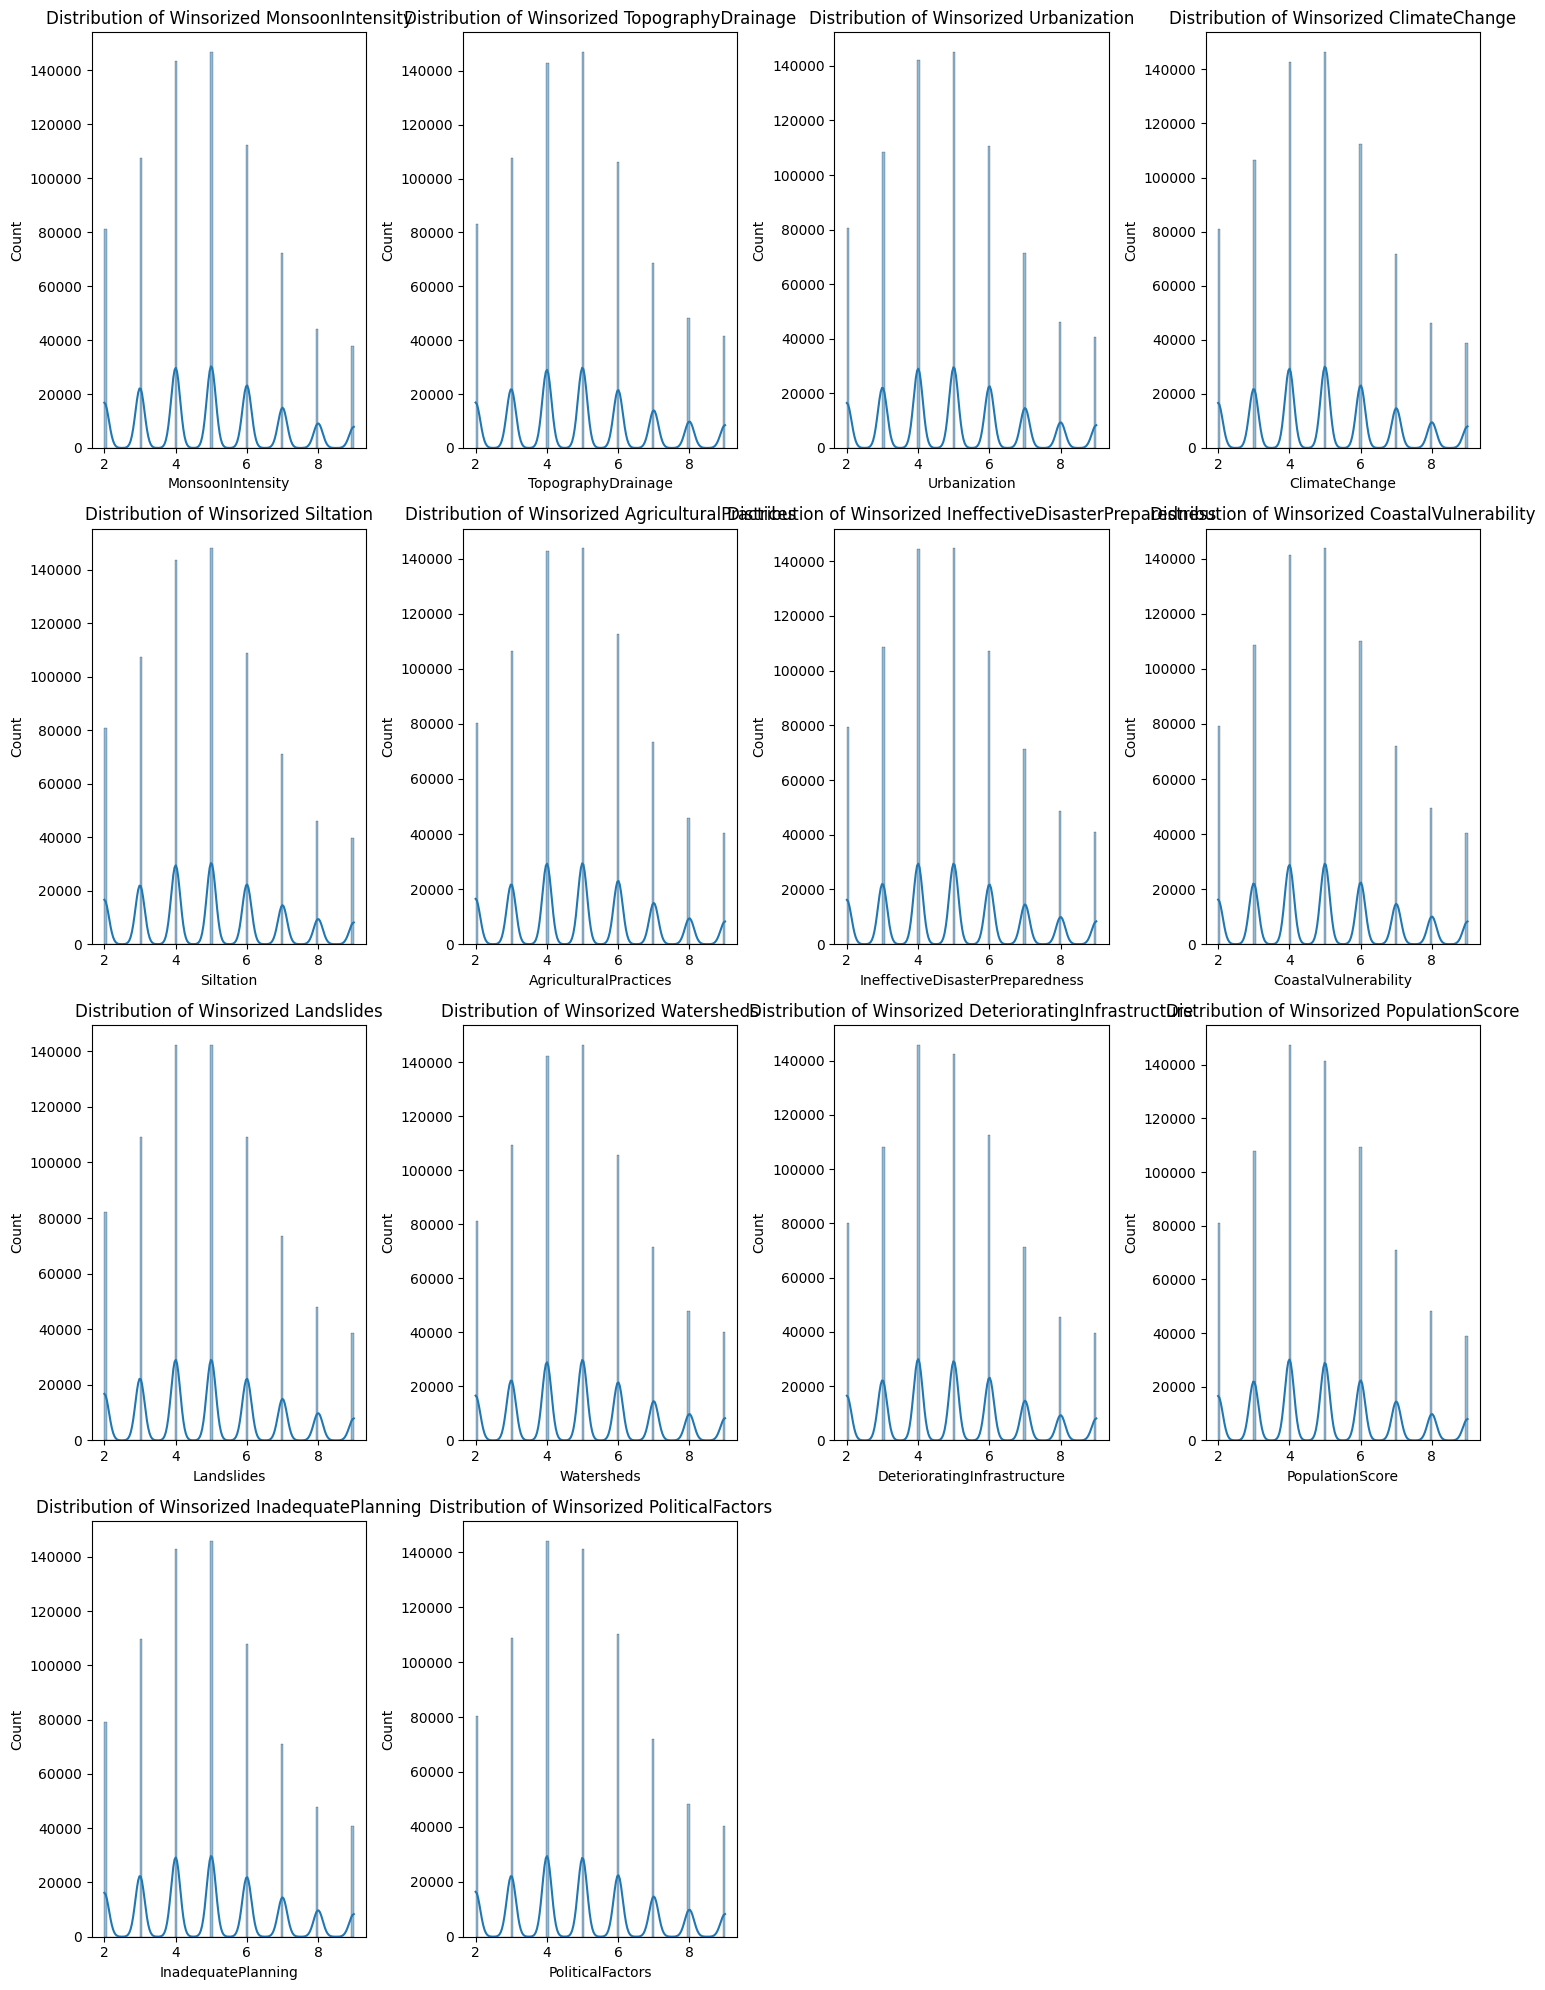

In [30]:
# Visualize distributions of remaining Winsorized columns

# Identify remaining numerical columns that were Winsorized
remaining_cols_winsorized = remaining_cols_to_winsorize

# Calculate the number of rows and columns for subplots
n_cols = 4  # You can adjust this number
n_rows = (len(remaining_cols_winsorized) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5)) # Adjust figure size based on the number of rows
for i, col in enumerate(remaining_cols_winsorized):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=test_data, x=col, kde=True)
    plt.title(f'Distribution of Winsorized {col}')
plt.tight_layout()
plt.show()

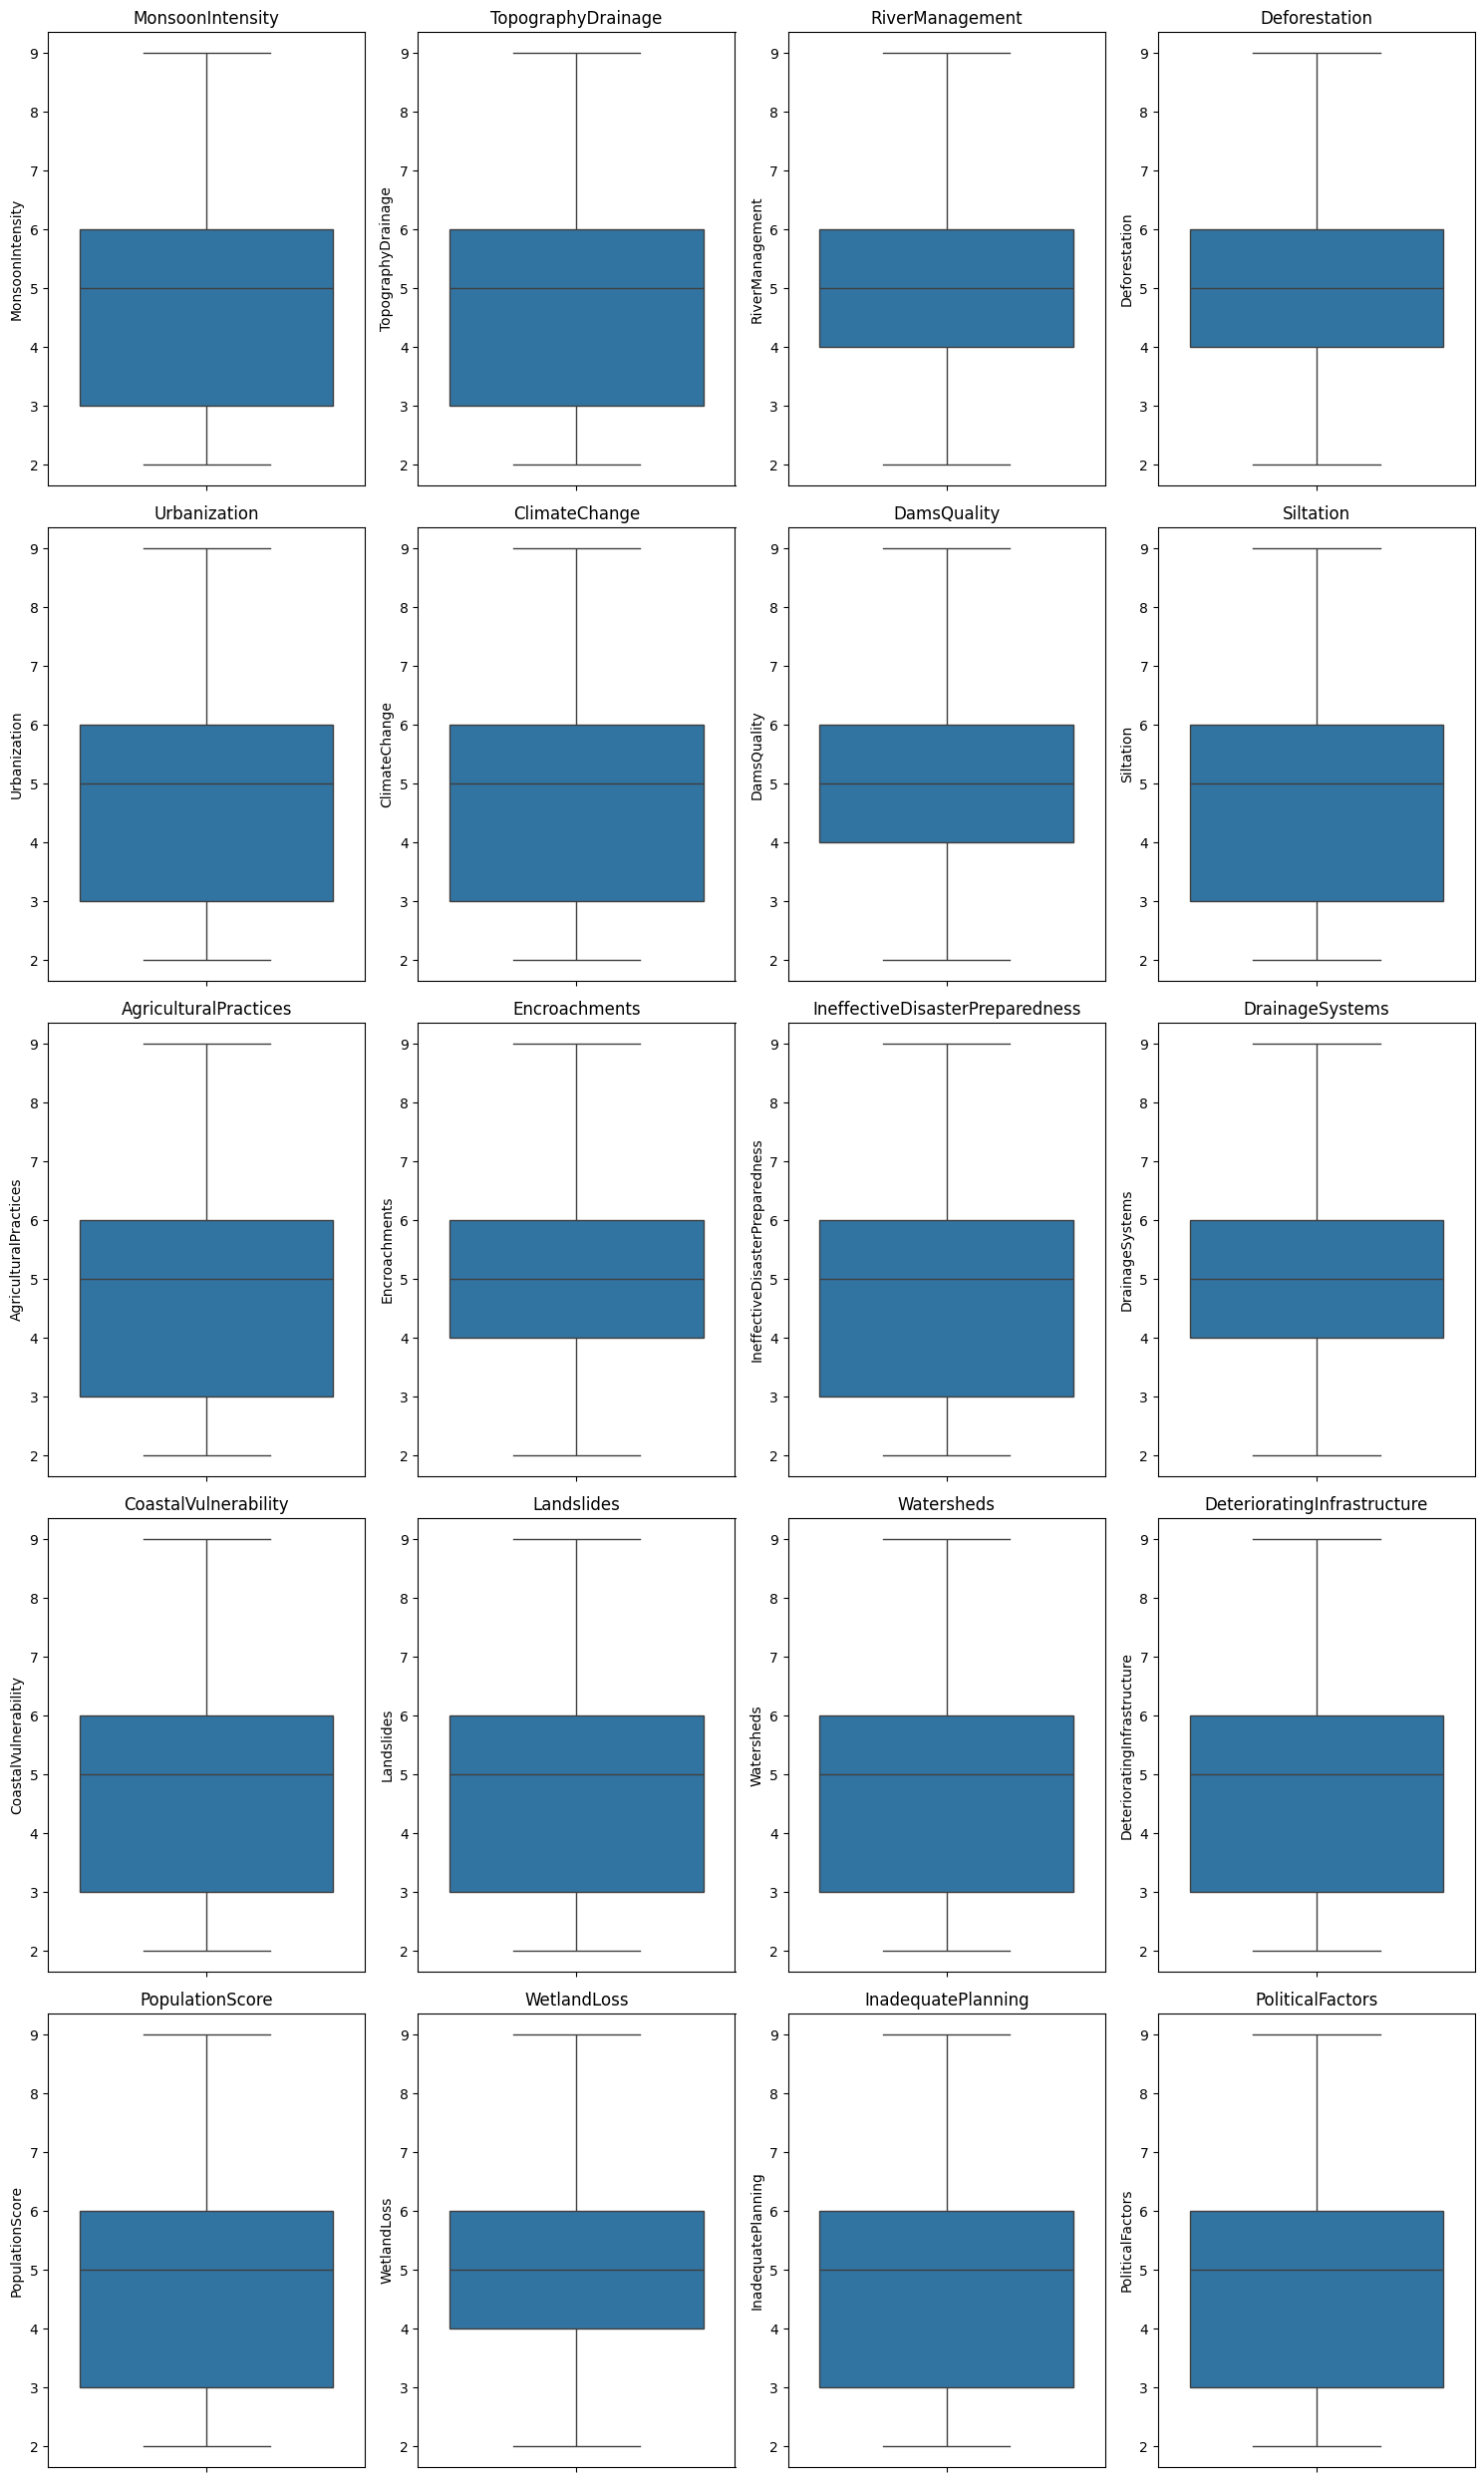

In [31]:
#confirming if the outliers are handled or not
plt.figure(figsize=(15, n_rows_test * 5)) # Adjust figure size based on the number of rows
for i, col in enumerate(numerical_cols_test):
    plt.subplot(n_rows_test, n_cols_test, i + 1)
    sns.boxplot(y=test_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [32]:
# Identify the target variable
target = 'FloodProbability'

# Create a list of feature columns, excluding the target and 'id'
features = [col for col in train_data.columns if col not in [target, 'id']]

print("Target variable:", target)
print("\nFeatures:", features)

Target variable: FloodProbability

Features: ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors']


In [33]:
# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Define features (X) and target (y)
# Assuming 'features' and 'target' variables are defined in a previous cell
# If not, you might need to define them here based on your column names.
target = 'FloodProbability'
features = [col for col in train_data.columns if col not in [target, 'id']]

X = train_data[features]
y = train_data[target]

# Split the training data to create a validation set
# We'll use 80% for training and 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original training data shape:", train_data.shape)
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_val.shape)
print("Training target shape:", y_train.shape)
print("Validation target shape:", y_val.shape)

Original training data shape: (1117957, 22)
Training features shape: (894365, 20)
Validation features shape: (223592, 20)
Training target shape: (894365,)
Validation target shape: (223592,)


In [35]:
# Install XGBoost if you haven't already
!pip install xgboost

In [36]:
# Initialize the XGBoost Regressor model
# We can start with default hyperparameters and tune later if needed
# Using 'hist' tree method for efficiency on large datasets
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', # Objective for regression
                             n_estimators=100,
                             learning_rate=0.1,
                             max_depth=6,
                             random_state=42,
                             n_jobs=-1, # Use all available cores
                             tree_method='hist' # Use histogram-based algorithm for efficiency
                            )

print("Training XGBoost model on the training data...")

# Train the model on the training data
xgb_model.fit(X_train, y_train)

print("XGBoost Regressor model trained successfully on the training data!")

Training XGBoost model on the training data...
XGBoost Regressor model trained successfully on the training data!


In [37]:
# Make predictions on the validation set
y_pred_val = xgb_model.predict(X_val)

# Evaluate the model using Root Mean Squared Error (RMSE)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)

print(f"Root Mean Squared Error (RMSE) on the validation set: {rmse_val}")

Root Mean Squared Error (RMSE) on the validation set: 0.025036330124841702


In [38]:
# Define features (X_full) and target (y_full) using the entire training data
X_full = train_data[features]
y_full = train_data[target]

# Initialize the XGBoost Regressor model with the hyperparameters used in the previous training step
# If you performed hyperparameter tuning, you would use the best hyperparameters here.
final_xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                                   n_estimators=100,
                                   learning_rate=0.1,
                                   max_depth=6,
                                   random_state=42,
                                   n_jobs=-1,
                                   tree_method='hist'
                                  )

print("Training final XGBoost model on the entire training data...")

# Train the model on the entire training data
final_xgb_model.fit(X_full, y_full)

print("Final XGBoost Regressor model trained successfully on the entire training data!")

Training final XGBoost model on the entire training data...
Final XGBoost Regressor model trained successfully on the entire training data!


In [39]:
# Prepare the test data - select the same features as used for training
X_test = test_data[features]

# Make predictions on the test data
predictions = final_xgb_model.predict(X_test)

print("Predictions on the test data have been generated.")
# You can view the first few predictions:
print(predictions[:10])

Predictions on the test data have been generated.
[0.56144613 0.47181547 0.4729519  0.47532323 0.47385564 0.5060584
 0.5321233  0.520202   0.47466066 0.55403066]


In [40]:
# Create the submission file

# Assuming 'test_data' and 'predictions' are available from previous steps
# Create a DataFrame with the 'id' from the test data and the 'FloodProbability' predictions
submission_df = pd.DataFrame({'id': test_data['id'], 'FloodProbability': predictions})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

Submission file 'submission.csv' created successfully!
